In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Necessary libraries

In [6]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchsummary import summary

In [18]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [1]:
# import albumentations as A
# import cv2

In [2]:
# from albumentations.pytorch import ToTensorV2
# from PIL import Image
# import matplotlib.pyplot as plt

In [8]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


Load all the modules

In [20]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/dataload.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/model.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/run.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/Session\ 9\ Assignment/utils.py /content

In [21]:
import dataload
import model
import run
import utils

from dataload import Draw, AlbumentationImageDataset, args, loader
from model import NetArch, return_summary
from run import Performance, scores
from utils import allot_device, Plots, plot_metrics

In [13]:
train_loader,test_loader = loader.load_data(128)
print(len(train_loader),len(test_loader))

100%|██████████| 170498071/170498071 [00:13<00:00, 12883441.59it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
391 79


<Figure size 640x480 with 0 Axes>

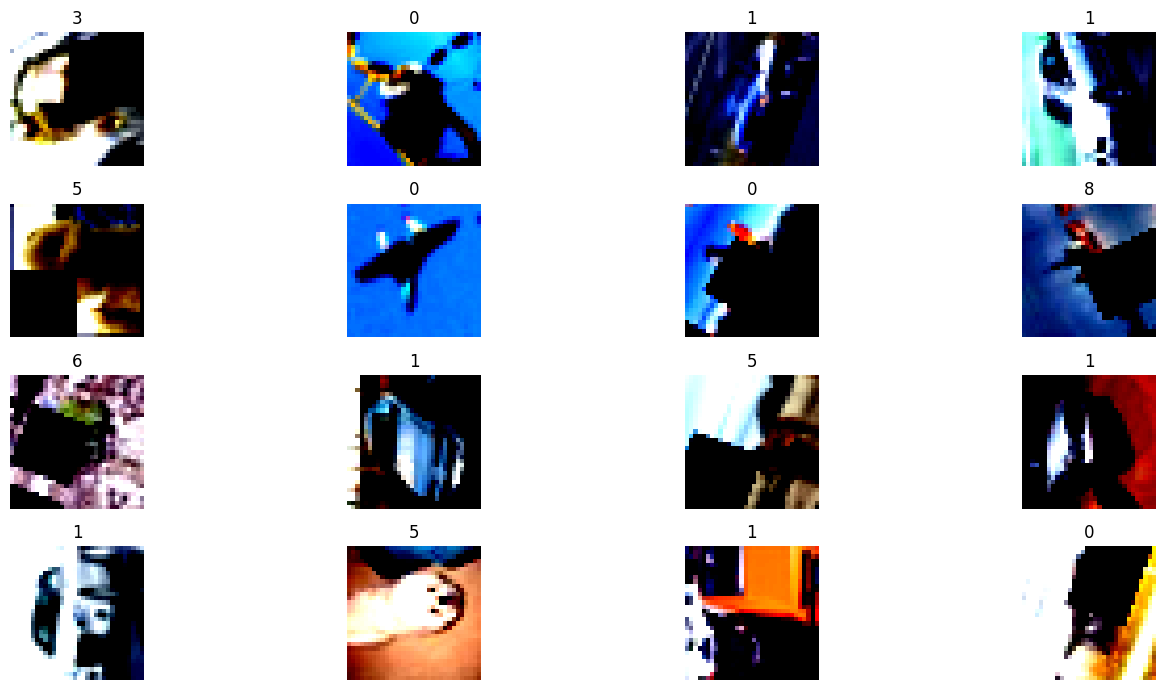

In [22]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

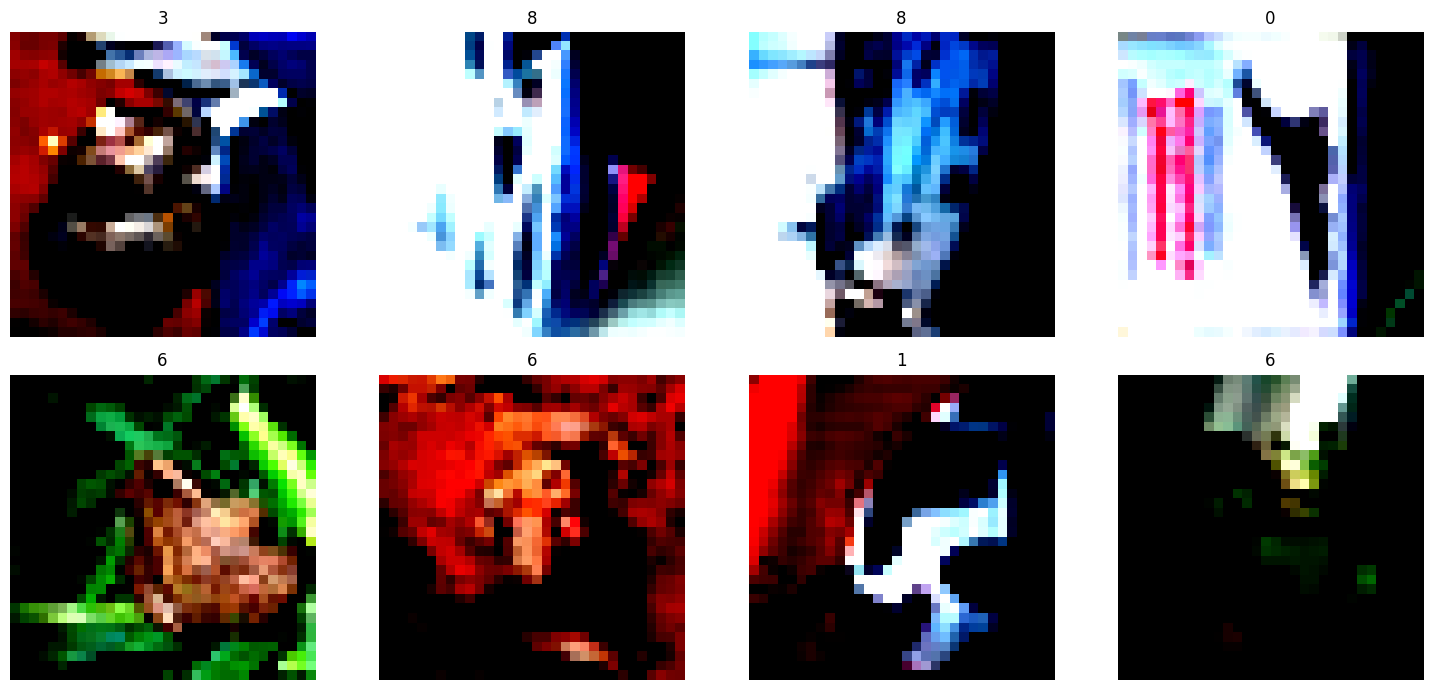

In [23]:
#test_data
Plots(None,9,test_loader).plot_images()

In [16]:
 # Setting up the device
device = allot_device(142)
print(f"{device} is available")

cuda is available


In [17]:
model = NetArch().to(device)

return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             560
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           5,792
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 64, 16, 16]          18,496
       BatchNorm2d-8           [-1, 64, 16, 16]             128
              ReLU-9           [-1, 64, 16, 16]               0
        Dropout2d-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]          73,856
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

In [36]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=18, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 72
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion,[False,0.01])

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()

Epoch 1


Train: Loss=1.4384 Batch_id=390 Accuracy=34.32: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]


Test set: Average loss: 0.0127, Accuracy: 4344/10000 (43.44%)

Epoch 2


Train: Loss=1.2353 Batch_id=390 Accuracy=46.57: 100%|██████████| 391/391 [00:19<00:00, 20.15it/s]


Test set: Average loss: 0.0096, Accuracy: 5587/10000 (55.87%)

Epoch 3


Train: Loss=1.3432 Batch_id=390 Accuracy=52.23: 100%|██████████| 391/391 [00:17<00:00, 22.29it/s]


Test set: Average loss: 0.0082, Accuracy: 6321/10000 (63.21%)

Epoch 4


Train: Loss=1.0531 Batch_id=390 Accuracy=56.30: 100%|██████████| 391/391 [00:16<00:00, 23.75it/s]


Test set: Average loss: 0.0084, Accuracy: 6179/10000 (61.79%)

Epoch 5


Train: Loss=0.9328 Batch_id=390 Accuracy=59.02: 100%|██████████| 391/391 [00:16<00:00, 23.59it/s]


Test set: Average loss: 0.0070, Accuracy: 6822/10000 (68.22%)

Epoch 6


Train: Loss=1.2578 Batch_id=390 Accuracy=61.08: 100%|██████████| 391/391 [00:17<00:00, 22.15it/s]


Test set: Average loss: 0.0067, Accuracy: 6995/10000 (69.95%)

Epoch 7


Train: Loss=1.1105 Batch_id=390 Accuracy=62.92: 100%|██████████| 391/391 [00:16<00:00, 23.56it/s]


Test set: Average loss: 0.0061, Accuracy: 7249/10000 (72.49%)

Epoch 8


Train: Loss=0.9385 Batch_id=390 Accuracy=64.39: 100%|██████████| 391/391 [00:17<00:00, 22.50it/s]


Test set: Average loss: 0.0059, Accuracy: 7399/10000 (73.99%)

Epoch 9


Train: Loss=1.0174 Batch_id=390 Accuracy=65.27: 100%|██████████| 391/391 [00:16<00:00, 23.58it/s]


Test set: Average loss: 0.0056, Accuracy: 7519/10000 (75.19%)

Epoch 10


Train: Loss=0.7161 Batch_id=390 Accuracy=66.35: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]


Test set: Average loss: 0.0059, Accuracy: 7454/10000 (74.54%)

Epoch 11


Train: Loss=1.1583 Batch_id=390 Accuracy=67.06: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]


Test set: Average loss: 0.0051, Accuracy: 7734/10000 (77.34%)

Epoch 12


Train: Loss=1.0517 Batch_id=390 Accuracy=68.10: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]


Test set: Average loss: 0.0052, Accuracy: 7691/10000 (76.91%)

Epoch 13


Train: Loss=1.0992 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:16<00:00, 23.54it/s]


Test set: Average loss: 0.0051, Accuracy: 7772/10000 (77.72%)

Epoch 14


Train: Loss=0.7344 Batch_id=390 Accuracy=69.32: 100%|██████████| 391/391 [00:17<00:00, 22.56it/s]


Test set: Average loss: 0.0050, Accuracy: 7764/10000 (77.64%)

Epoch 15


Train: Loss=0.9793 Batch_id=390 Accuracy=69.85: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]


Test set: Average loss: 0.0049, Accuracy: 7857/10000 (78.57%)

Epoch 16


Train: Loss=0.8843 Batch_id=390 Accuracy=70.06: 100%|██████████| 391/391 [00:17<00:00, 22.82it/s]


Test set: Average loss: 0.0046, Accuracy: 7952/10000 (79.52%)

Epoch 17


Train: Loss=0.8070 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]


Test set: Average loss: 0.0049, Accuracy: 7843/10000 (78.43%)

Epoch 18


Train: Loss=0.8815 Batch_id=390 Accuracy=71.09: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]


Test set: Average loss: 0.0046, Accuracy: 8034/10000 (80.34%)

Epoch 19


Train: Loss=0.9346 Batch_id=390 Accuracy=71.73: 100%|██████████| 391/391 [00:16<00:00, 23.46it/s]


Test set: Average loss: 0.0045, Accuracy: 8029/10000 (80.29%)

Epoch 20


Train: Loss=0.6833 Batch_id=390 Accuracy=71.85: 100%|██████████| 391/391 [00:16<00:00, 23.75it/s]


Test set: Average loss: 0.0045, Accuracy: 8054/10000 (80.54%)

Epoch 21


Train: Loss=1.1371 Batch_id=390 Accuracy=72.64: 100%|██████████| 391/391 [00:16<00:00, 23.59it/s]


Test set: Average loss: 0.0045, Accuracy: 8040/10000 (80.40%)

Epoch 22


Train: Loss=0.7119 Batch_id=390 Accuracy=72.65: 100%|██████████| 391/391 [00:16<00:00, 23.33it/s]


Test set: Average loss: 0.0043, Accuracy: 8106/10000 (81.06%)

Epoch 23


Train: Loss=0.7535 Batch_id=390 Accuracy=72.83: 100%|██████████| 391/391 [00:16<00:00, 23.44it/s]


Test set: Average loss: 0.0040, Accuracy: 8247/10000 (82.47%)

Epoch 24


Train: Loss=0.7706 Batch_id=390 Accuracy=73.60: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]


Test set: Average loss: 0.0041, Accuracy: 8207/10000 (82.07%)

Epoch 25


Train: Loss=0.6900 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:17<00:00, 22.84it/s]


Test set: Average loss: 0.0040, Accuracy: 8261/10000 (82.61%)

Epoch 26


Train: Loss=0.8204 Batch_id=390 Accuracy=74.11: 100%|██████████| 391/391 [00:16<00:00, 23.65it/s]


Test set: Average loss: 0.0040, Accuracy: 8210/10000 (82.10%)

Epoch 27


Train: Loss=0.7983 Batch_id=390 Accuracy=74.53: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]


Test set: Average loss: 0.0040, Accuracy: 8276/10000 (82.76%)

Epoch 28


Train: Loss=0.5781 Batch_id=390 Accuracy=74.58: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


Test set: Average loss: 0.0040, Accuracy: 8271/10000 (82.71%)

Epoch 29


Train: Loss=0.8590 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:17<00:00, 22.21it/s]


Test set: Average loss: 0.0038, Accuracy: 8343/10000 (83.43%)

Epoch 30


Train: Loss=0.8938 Batch_id=390 Accuracy=74.82: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]


Test set: Average loss: 0.0040, Accuracy: 8281/10000 (82.81%)

Epoch 31


Train: Loss=1.0027 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:17<00:00, 22.46it/s]


Test set: Average loss: 0.0039, Accuracy: 8282/10000 (82.82%)

Epoch 32


Train: Loss=0.7378 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]


Test set: Average loss: 0.0038, Accuracy: 8340/10000 (83.40%)

Epoch 33


Train: Loss=0.6259 Batch_id=390 Accuracy=75.56: 100%|██████████| 391/391 [00:17<00:00, 22.87it/s]


Test set: Average loss: 0.0039, Accuracy: 8311/10000 (83.11%)

Epoch 34


Train: Loss=0.5216 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:16<00:00, 23.45it/s]


Test set: Average loss: 0.0037, Accuracy: 8371/10000 (83.71%)

Epoch 35


Train: Loss=0.8269 Batch_id=390 Accuracy=76.01: 100%|██████████| 391/391 [00:16<00:00, 23.72it/s]


Test set: Average loss: 0.0037, Accuracy: 8366/10000 (83.66%)

Epoch 36


Train: Loss=0.8013 Batch_id=390 Accuracy=76.23: 100%|██████████| 391/391 [00:16<00:00, 23.30it/s]


Test set: Average loss: 0.0037, Accuracy: 8422/10000 (84.22%)

Epoch 37


Train: Loss=0.5471 Batch_id=390 Accuracy=76.14: 100%|██████████| 391/391 [00:16<00:00, 23.03it/s]


Test set: Average loss: 0.0037, Accuracy: 8401/10000 (84.01%)

Epoch 38


Train: Loss=0.6421 Batch_id=390 Accuracy=76.26: 100%|██████████| 391/391 [00:18<00:00, 21.28it/s]


Test set: Average loss: 0.0037, Accuracy: 8379/10000 (83.79%)

Epoch 39


Train: Loss=0.6648 Batch_id=390 Accuracy=76.71: 100%|██████████| 391/391 [00:16<00:00, 23.21it/s]


Test set: Average loss: 0.0037, Accuracy: 8419/10000 (84.19%)

Epoch 40


Train: Loss=0.8813 Batch_id=390 Accuracy=76.64: 100%|██████████| 391/391 [00:17<00:00, 21.82it/s]


Test set: Average loss: 0.0036, Accuracy: 8468/10000 (84.68%)

Epoch 41


Train: Loss=0.6940 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:16<00:00, 23.13it/s]


Test set: Average loss: 0.0037, Accuracy: 8385/10000 (83.85%)

Epoch 42


Train: Loss=0.8400 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]


Test set: Average loss: 0.0036, Accuracy: 8422/10000 (84.22%)

Epoch 43


Train: Loss=0.8370 Batch_id=390 Accuracy=77.07: 100%|██████████| 391/391 [00:16<00:00, 23.58it/s]


Test set: Average loss: 0.0035, Accuracy: 8484/10000 (84.84%)

Epoch 44


Train: Loss=0.7056 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


Test set: Average loss: 0.0036, Accuracy: 8455/10000 (84.55%)

Epoch 45


Train: Loss=0.5654 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:16<00:00, 23.80it/s]


Test set: Average loss: 0.0036, Accuracy: 8454/10000 (84.54%)

Epoch 46


Train: Loss=0.4664 Batch_id=390 Accuracy=77.30: 100%|██████████| 391/391 [00:16<00:00, 23.62it/s]


Test set: Average loss: 0.0036, Accuracy: 8455/10000 (84.55%)

Epoch 47


Train: Loss=0.8266 Batch_id=390 Accuracy=77.82: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.0037, Accuracy: 8426/10000 (84.26%)

Epoch 48


Train: Loss=0.5910 Batch_id=390 Accuracy=77.76: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]


Test set: Average loss: 0.0036, Accuracy: 8444/10000 (84.44%)

Epoch 49


Train: Loss=0.4820 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:16<00:00, 23.55it/s]


Test set: Average loss: 0.0036, Accuracy: 8498/10000 (84.98%)

Epoch 50


Train: Loss=0.6628 Batch_id=390 Accuracy=77.97: 100%|██████████| 391/391 [00:16<00:00, 23.73it/s]


Test set: Average loss: 0.0035, Accuracy: 8506/10000 (85.06%)

Epoch 51


Train: Loss=0.6257 Batch_id=390 Accuracy=78.24: 100%|██████████| 391/391 [00:16<00:00, 23.45it/s]


Test set: Average loss: 0.0034, Accuracy: 8514/10000 (85.14%)

Epoch 52


Train: Loss=0.7472 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:16<00:00, 23.52it/s]


Test set: Average loss: 0.0034, Accuracy: 8510/10000 (85.10%)

Epoch 53


Train: Loss=0.8078 Batch_id=390 Accuracy=78.31: 100%|██████████| 391/391 [00:17<00:00, 22.59it/s]


Test set: Average loss: 0.0035, Accuracy: 8480/10000 (84.80%)

Epoch 54


Train: Loss=0.6357 Batch_id=390 Accuracy=78.31: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]


Test set: Average loss: 0.0035, Accuracy: 8520/10000 (85.20%)

Epoch 55


Train: Loss=0.8245 Batch_id=390 Accuracy=78.59: 100%|██████████| 391/391 [00:17<00:00, 22.79it/s]


Test set: Average loss: 0.0035, Accuracy: 8543/10000 (85.43%)

Epoch 56


Train: Loss=0.2309 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [00:20<00:00, 19.42it/s]


Test set: Average loss: 0.0034, Accuracy: 8554/10000 (85.54%)

Epoch 57


Train: Loss=0.6473 Batch_id=390 Accuracy=78.67: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]


Test set: Average loss: 0.0034, Accuracy: 8522/10000 (85.22%)

Epoch 58


Train: Loss=0.4839 Batch_id=390 Accuracy=78.50: 100%|██████████| 391/391 [00:17<00:00, 21.79it/s]


Test set: Average loss: 0.0033, Accuracy: 8589/10000 (85.89%)

Epoch 59


Train: Loss=0.4774 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:16<00:00, 23.23it/s]


Test set: Average loss: 0.0033, Accuracy: 8587/10000 (85.87%)

Epoch 60


Train: Loss=0.5701 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:17<00:00, 22.86it/s]


Test set: Average loss: 0.0034, Accuracy: 8532/10000 (85.32%)

Epoch 61


Train: Loss=0.5387 Batch_id=390 Accuracy=78.73: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]


Test set: Average loss: 0.0034, Accuracy: 8517/10000 (85.17%)

Epoch 62


Train: Loss=0.4855 Batch_id=390 Accuracy=79.12: 100%|██████████| 391/391 [00:17<00:00, 22.98it/s]


Test set: Average loss: 0.0033, Accuracy: 8634/10000 (86.34%)

Epoch 63


Train: Loss=0.4969 Batch_id=390 Accuracy=79.34: 100%|██████████| 391/391 [00:17<00:00, 22.00it/s]


Test set: Average loss: 0.0033, Accuracy: 8608/10000 (86.08%)

Epoch 64


Train: Loss=0.5358 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:16<00:00, 23.47it/s]


Test set: Average loss: 0.0033, Accuracy: 8549/10000 (85.49%)

Epoch 65


Train: Loss=0.5928 Batch_id=390 Accuracy=79.48: 100%|██████████| 391/391 [00:16<00:00, 23.29it/s]


Test set: Average loss: 0.0033, Accuracy: 8594/10000 (85.94%)

Epoch 66


Train: Loss=0.7522 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:18<00:00, 21.41it/s]


Test set: Average loss: 0.0033, Accuracy: 8562/10000 (85.62%)

Epoch 67


Train: Loss=0.7709 Batch_id=390 Accuracy=79.54: 100%|██████████| 391/391 [00:16<00:00, 23.36it/s]


Test set: Average loss: 0.0033, Accuracy: 8589/10000 (85.89%)

Epoch 68


Train: Loss=0.5021 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]


Test set: Average loss: 0.0032, Accuracy: 8652/10000 (86.52%)

Epoch 69


Train: Loss=0.7287 Batch_id=390 Accuracy=79.42: 100%|██████████| 391/391 [00:16<00:00, 23.11it/s]


Test set: Average loss: 0.0032, Accuracy: 8589/10000 (85.89%)

Epoch 70


Train: Loss=0.6199 Batch_id=390 Accuracy=79.63: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]


Test set: Average loss: 0.0031, Accuracy: 8654/10000 (86.54%)

Epoch 71


Train: Loss=0.6981 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:17<00:00, 21.76it/s]


Test set: Average loss: 0.0031, Accuracy: 8625/10000 (86.25%)

Epoch 72


Train: Loss=0.6529 Batch_id=390 Accuracy=79.67: 100%|██████████| 391/391 [00:16<00:00, 23.15it/s]


Test set: Average loss: 0.0032, Accuracy: 8640/10000 (86.40%)



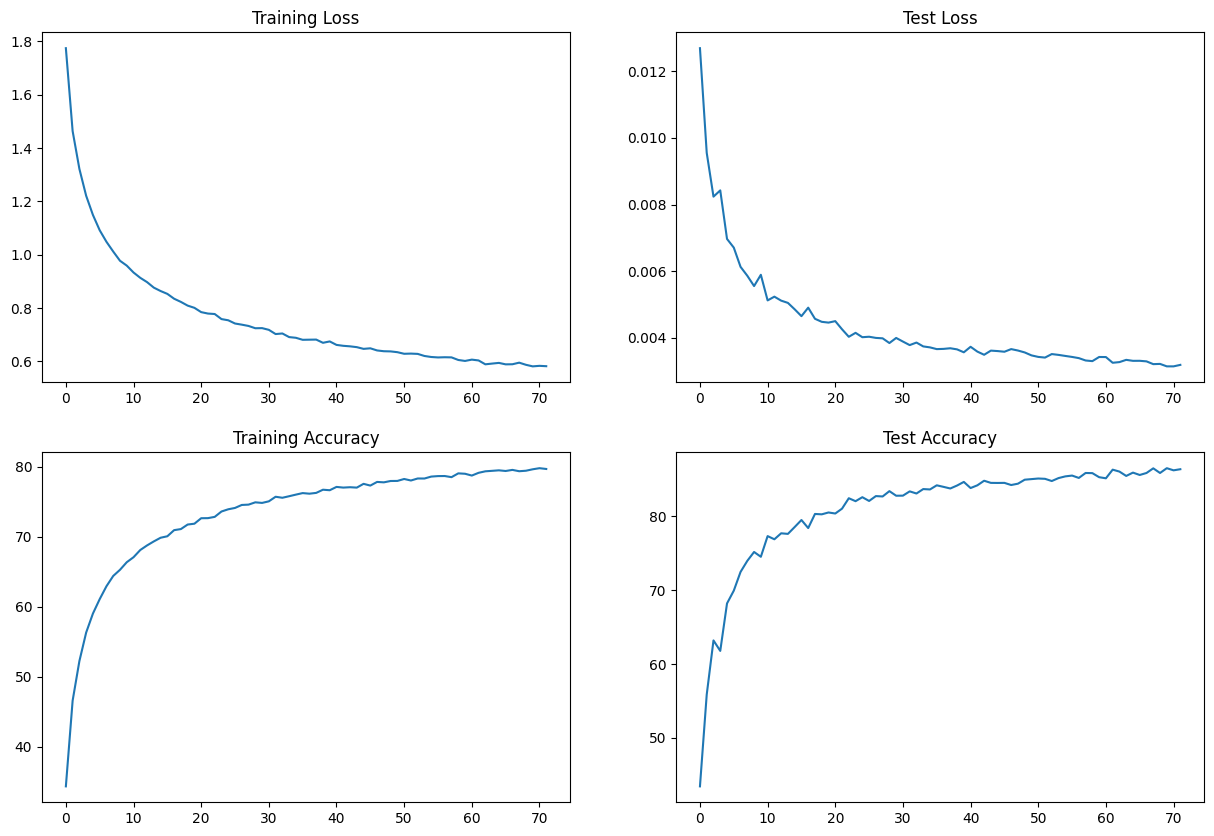

In [37]:
metrics = scores()
plot_metrics(metrics)

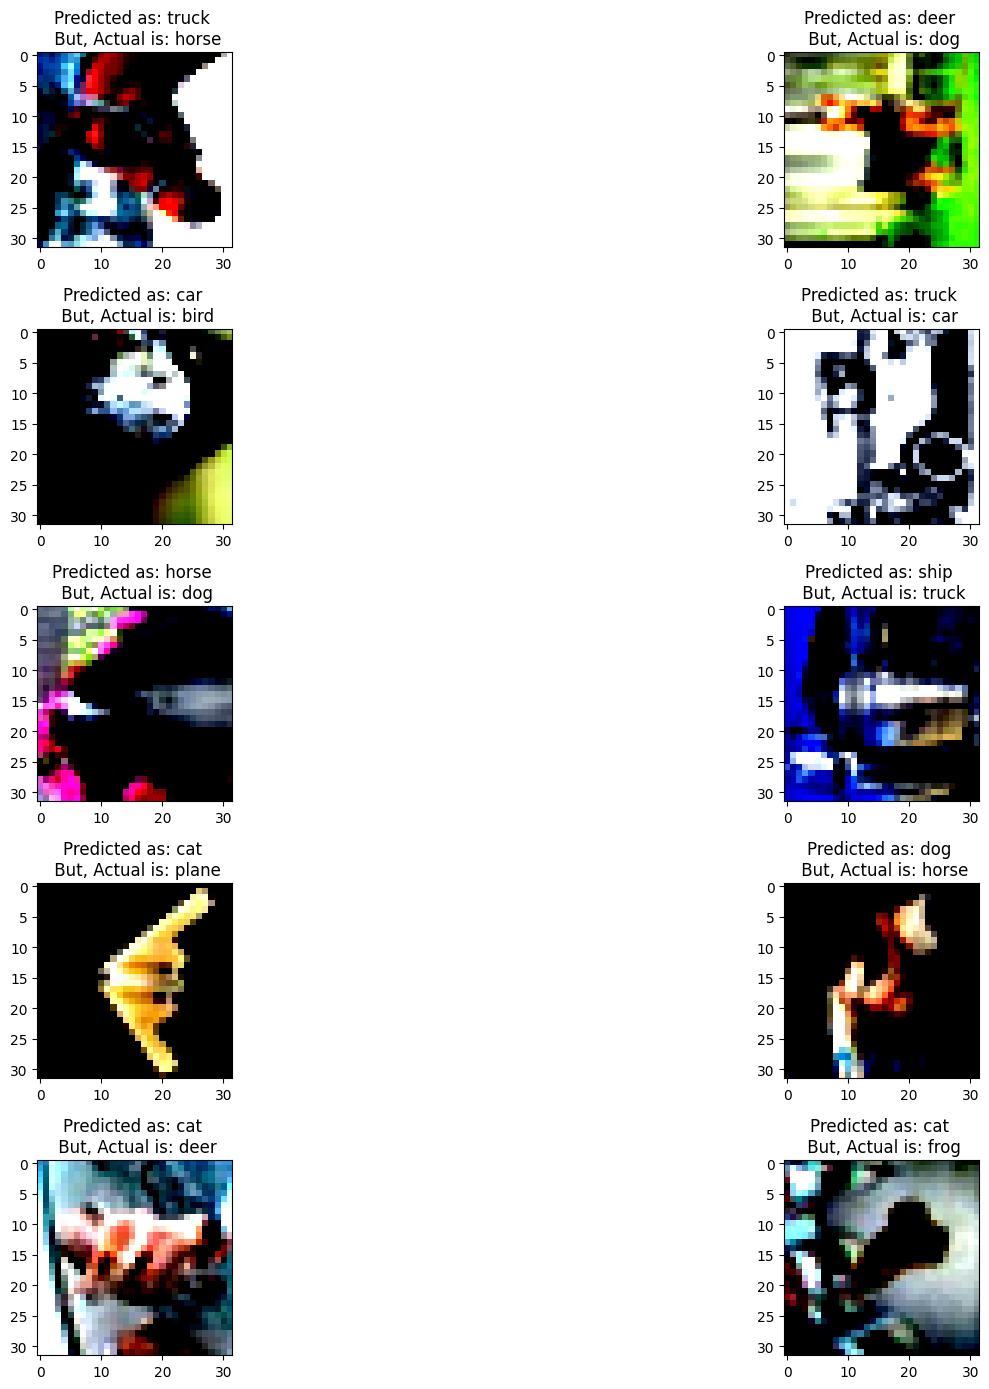

In [38]:
Plots((model,test_loader,device,10)).mis_classified()